In [1]:
import os 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

os.chdir(r'C:\Users\ALEJANDRO\Desktop\Proyecto análisis de caso')
os.listdir()

['Analisis de caso-version2.py',
 'AnalisisDeCaso.ipynb',
 'Datos',
 'diccionarios_em2017_0.xlsx',
 'Documentos',
 'Hogares_2017_V2_03092018.txt',
 'IPM.ppt',
 'IPM1.doc',
 'Personas_2017_V2_03092018.txt',
 'tabla3.png',
 'tabla4.png',
 'TablaGini.png',
 'variables_adicionales_hogar_v3.txt',
 'variables_adicionales_personas_v2.txt',
 'viviendas_2017_v2_03092018.txt',
 '~$diccionarios_em2017_0.xlsx',
 '~$IPM.ppt']

In [2]:
# tabla hogar
tabla_hog=pd.read_csv('variables_adicionales_hogar_v3.txt',sep = ';', dtype={'DIRECTORIO':str, 'DIRECTORIO_HOG': str})
tabla_hog['DIRECTORIO_HOG'].duplicated().value_counts()  # no hay duplicados

False    109111
Name: DIRECTORIO_HOG, dtype: int64

In [3]:
# tabla vivienda 
tabla_viv=pd.read_csv('viviendas_2017_v2_03092018.txt',sep = ',', encoding='latin1', dtype={'DIRECTORIO':str})
tabla_viv['DIRECTORIO'].duplicated().value_counts()

False    107218
Name: DIRECTORIO, dtype: int64

In [4]:
# tabla variables adicionales personas
tabla_per=pd.read_csv('variables_adicionales_personas_v2.txt', sep=',',encoding='latin1', dtype={'directorio':str, 'directorio_hog':str,'directorio_per':str})
tabla_per=tabla_per.rename(columns={'directorio':'DIRECTORIO', 'directorio_hog':'DIRECTORIO_HOG'})
tabla_per['directorio_per'].duplicated().value_counts()  # no hay duplicados

False    319952
Name: directorio_per, dtype: int64

# Filtrando la data

In [105]:
hogar=tabla_hog.filter(['DIRECTORIO','DIRECTORIO_HOG','TOTAL_PUNTAJE_ICV','DIRECTORIO_PER','FEX_C','INGRESOS_HOG',
                        'INGRESOS_PER_CAPITA','HOGAR_LP', 'HOGAR_LE','TOTAL_PUNTAJE_ICV','PUNTAJE_HACINAMIENTO','PUNTAJE_EDUC_JEFE',
                        'PUNTAJE_PROM_12','ESTRATO_VIV', 'IPM_DESEMPLEO_LP','INGRESOS_HOG',
                        'IPM','HOGAR_POBRE_IBM','IPM_BAJO_LOGRO_ED','IPM_ANALFABET',
                        'IPM_INASISTENCIA_ESC','IPM_REZAGO_ESC', 'HOGAR_POBRE_IPM',
                        'IPM_PI','IPM_TRABAJO_INFANTIL','IPM_ASEG_SALUD','IPM_ACCESO_SALUD','IPM_DESEMPLEO_LP',
                        'IPM_EMPLEO_INFORMAL','IPM_AGUA','IPM_SAN_BASICO','IPM_PISOS','IPM_PAREDES',
                        'IPM_HACINAMIENTO','IPM_EMPLEO_FORMAL'])


In [100]:
vivienda=tabla_viv.filter(['DIRECTORIO','DPTOMPIO','CLASE','FEX_C','FEX_P','ESTRATO_TEX','LOCALIDAD_TEX',   
                          'ESTRATO', 'SEGMENTO', 'COD_UPZ','NVCBP10','NVCBP11B','NVCBP11C','NVCBP14B'])  

In [7]:
personas=tabla_per.filter(['DIRECTORIO','DIRECTORIO_HOG','directorio_per','pet','pea','ocupados','desempleado',
                           'informal','inactivo','grupo_etario'])

In [109]:
# PEGANDO LAS TABLAS

union1=pd.merge(left=hogar, right=vivienda, how='left', on='DIRECTORIO') 
union1.columns


Index(['DIRECTORIO', 'DIRECTORIO_HOG', 'DIRECTORIO_PER', 'FEX_C_x',
       'INGRESOS_HOG', 'INGRESOS_PER_CAPITA', 'HOGAR_LP', 'HOGAR_LE',
       'PUNTAJE_HACINAMIENTO', 'PUNTAJE_EDUC_JEFE', 'PUNTAJE_PROM_12',
       'ESTRATO_VIV', 'IPM_DESEMPLEO_LP', 'INGRESOS_HOG', 'IPM',
       'IPM_BAJO_LOGRO_ED', 'IPM_ANALFABET', 'IPM_INASISTENCIA_ESC',
       'IPM_REZAGO_ESC', 'HOGAR_POBRE_IPM', 'IPM_PI', 'IPM_TRABAJO_INFANTIL',
       'IPM_ASEG_SALUD', 'IPM_ACCESO_SALUD', 'IPM_DESEMPLEO_LP', 'IPM_AGUA',
       'IPM_SAN_BASICO', 'IPM_PISOS', 'IPM_PAREDES', 'IPM_HACINAMIENTO',
       'IPM_EMPLEO_FORMAL', 'DPTOMPIO', 'CLASE', 'FEX_C_y', 'FEX_P',
       'ESTRATO_TEX', 'LOCALIDAD_TEX', 'ESTRATO', 'SEGMENTO', 'COD_UPZ',
       'NVCBP10', 'NVCBP11B', 'NVCBP11C', 'NVCBP14B'],
      dtype='object')

### Filtrando Bogotá urbana 

In [110]:
condicion1 = union1.DPTOMPIO.isin([11001]) & union1.CLASE.isin([1])
bogota_urbana = union1.loc[condicion1,]
bogota_urbana.head()


,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,FEX_C_x,INGRESOS_HOG,INGRESOS_PER_CAPITA,HOGAR_LP,HOGAR_LE,PUNTAJE_HACINAMIENTO,PUNTAJE_EDUC_JEFE,...,FEX_P,ESTRATO_TEX,LOCALIDAD_TEX,ESTRATO,SEGMENTO,COD_UPZ,NVCBP10,NVCBP11B,NVCBP11C,NVCBP14B
0,101000,1010001,10100011,16.604442,1.702367e+07,5.674556e+06,0,0,12.8,11.52,...,15.655643,12.Casa Blanca Suba,\tSUBA\t,1100112,1967,23.0,2,1,1,2
1,101001,1010011,10100111,26.046357,3.372667e+06,8.431667e+05,0,0,12.8,11.52,...,24.703971,58.San Cristobal Norte,\tUSAQUEN\t,1100158,5969,11.0,2,1,1,2
2,101002,1010021,10100211,13.840826,2.225000e+06,1.112500e+06,0,0,12.8,10.53,...,14.022222,70.Toberin,\tUSAQUEN\t,1100170,6971,12.0,1,1,1,2
3,101003,1010031,10100311,7.011111,3.620000e+06,1.206667e+06,0,0,12.8,7.37,...,14.022222,70.Toberin,\tUSAQUEN\t,1100170,6971,12.0,1,1,1,2
4,101004,1010041,10100411,67.930390,4.166667e+03,4.166667e+03,1,1,12.8,11.52,...,68.607867,76. USAQUÉN: Country Club + USAQUÉN + Santa Bá...,\tUSAQUEN\t,1100176,7470,803.0,2,1,1,2


In [111]:
# Verificando valores nulos 
bogota_urbana.isnull().sum() 

DIRECTORIO              0
DIRECTORIO_HOG          0
DIRECTORIO_PER          0
FEX_C_x                 0
INGRESOS_HOG            0
INGRESOS_PER_CAPITA     0
HOGAR_LP                0
HOGAR_LE                0
PUNTAJE_HACINAMIENTO    0
PUNTAJE_EDUC_JEFE       0
PUNTAJE_PROM_12         0
ESTRATO_VIV             0
IPM_DESEMPLEO_LP        0
INGRESOS_HOG            0
IPM                     0
IPM_BAJO_LOGRO_ED       0
IPM_ANALFABET           0
IPM_INASISTENCIA_ESC    0
IPM_REZAGO_ESC          0
HOGAR_POBRE_IPM         0
IPM_PI                  0
IPM_TRABAJO_INFANTIL    0
IPM_ASEG_SALUD          0
IPM_ACCESO_SALUD        0
IPM_DESEMPLEO_LP        0
IPM_AGUA                0
IPM_SAN_BASICO          0
IPM_PISOS               0
IPM_PAREDES             0
IPM_HACINAMIENTO        0
IPM_EMPLEO_FORMAL       0
DPTOMPIO                0
CLASE                   0
FEX_C_y                 0
FEX_P                   0
ESTRATO_TEX             0
LOCALIDAD_TEX           0
ESTRATO                 0
SEGMENTO    

In [14]:
bogota_urbana.describe()

,DIRECTORIO_PER,FEX_C_x,INGRESOS_HOG,INGRESOS_PER_CAPITA,HOGAR_LP,HOGAR_LE,PER_UG,PUNTAJE_HACINAMIENTO,PUNTAJE_EDUC_JEFE,PUNTAJE_PROM_12,...,CLASE,FEX_C_y,FEX_P,ESTRATO,SEGMENTO,COD_UPZ,NVCBP10,NVCBP11B,NVCBP11C,NVCBP14B
count,7.464000e+04,74640.000000,7.464000e+04,7.464000e+04,74640.000000,74640.000000,74640.000000,74640.000000,74640.000000,74640.000000,...,74640.0,74640.000000,74640.000000,7.464000e+04,74640.000000,74640.000000,74640.000000,74640.000000,74640.000000,74640.000000
mean,1.992113e+07,36.139338,3.623199e+06,1.550905e+06,0.132998,0.057744,2.857677,12.480772,9.825862,10.762223,...,1.0,36.139338,36.986742,1.100144e+06,4758.343596,183.893261,1.726326,1.001005,1.003055,1.905694
std,6.236485e+06,27.805797,4.419272e+06,2.190505e+06,0.339575,0.233260,1.438276,1.305814,2.529806,2.316096,...,0.0,27.805797,24.761120,2.561030e+01,2190.392432,278.564904,0.496247,0.031683,0.055185,0.292256
min,1.010001e+07,2.417681,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.0,2.417681,4.835361,1.100101e+06,1001.000000,11.000000,1.000000,1.000000,1.000000,1.000000
25%,1.430419e+07,15.743414,1.197700e+06,4.375000e+05,0.000000,0.000000,2.000000,12.800000,9.410000,9.660000,...,1.0,15.743414,16.789525,1.100122e+06,2849.000000,41.000000,1.000000,1.000000,1.000000,2.000000
50%,1.856896e+07,28.875156,2.238334e+06,8.500000e+05,0.000000,0.000000,3.000000,12.800000,10.530000,11.540000,...,1.0,28.875156,33.801924,1.100144e+06,4780.000000,72.000000,2.000000,1.000000,1.000000,2.000000
75%,2.551034e+07,49.408737,4.386667e+06,1.770000e+06,0.000000,0.000000,4.000000,12.800000,11.520000,12.110000,...,1.0,49.408737,49.779968,1.100166e+06,6658.000000,101.000000,2.000000,1.000000,1.000000,2.000000
max,3.151781e+07,273.059235,1.732000e+08,5.773333e+07,1.000000,1.000000,17.000000,12.800000,11.520000,12.310000,...,1.0,273.059235,171.164048,1.100190e+06,8554.000000,817.000000,4.000000,2.000000,2.000000,2.000000


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# POBREZA MONTARIA

## LINEA DE POBREZA (LP) : Hogares que están por debajo de la línea de pobreza

In [29]:
LP=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['HOGAR_LP']).apply(lambda r: r/r.sum(), axis=1).reset_index()
LP=LP.rename(columns={0:'HOGAR_NO_POBRE', 1:'HOGAR_POBRE'})
LP=LP.replace('\t', '',regex=True)
LP

HOGAR_LP,LOCALIDAD_TEX,HOGAR_NO_POBRE,HOGAR_POBRE
0,ANTONIO NARIÑO,0.928205,0.071795
1,BARRIOS UNIDOS,0.933174,0.066826
2,BOSA,0.815907,0.184093
3,CANDELARIA,0.848156,0.151844
4,CHAPINERO,0.921379,0.078621
5,CIUDAD BOLIVAR,0.766020,0.233980
6,ENGATIVA,0.924821,0.075179
7,FONTIBON,0.918308,0.081692
8,KENNEDY,0.854835,0.145165
9,LOS MARTIRES,0.896651,0.103349


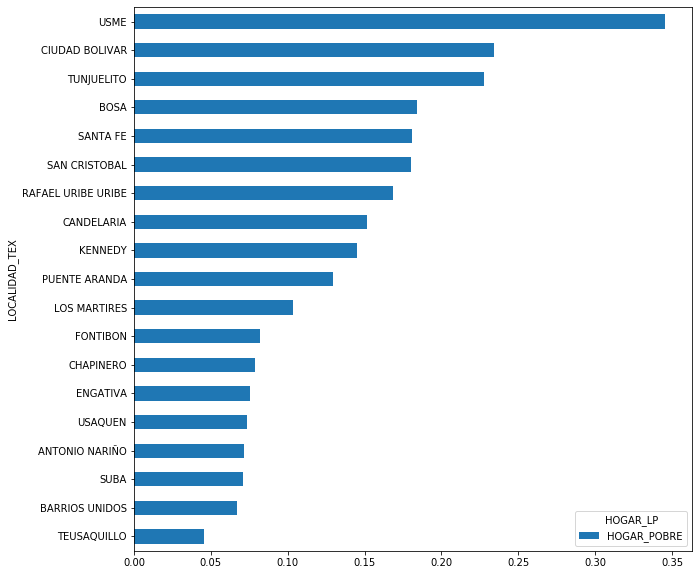

In [31]:
LP.groupby("LOCALIDAD_TEX")[["HOGAR_POBRE"]].mean().sort_values(by=["HOGAR_POBRE"],ascending=True).plot(kind='barh', figsize=(10,10))

In [97]:
df=bogota_urbana[['HOGAR_LP','LOCALIDAD_TEX']]
LP=sum(df.HOGAR_LP)/len(df.HOGAR_LP)
print('Proporción hogar por LP :',LP)

Proporción hogar por LP : 0.1329983922829582


In [35]:
dummy=pd.get_dummies(bogota_urbana['HOGAR_LP'])
df=df.merge(dummy, left_index=True, right_index=True)
HLP=df.groupby('LOCALIDAD_TEX').agg({"HOGAR_LP": ["sum"]}).reset_index()
HLP=HLP.replace('\t', '',regex=True)
HLP=HLP.sort_values(by=[('HOGAR_LP', 'sum')],ascending=False)

print(HLP[['HOGAR_LP']].sum())
HLP

HOGAR_LP  sum    9927
dtype: int64


,LOCALIDAD_TEX,HOGAR_LP
,,sum
8,KENNEDY,1321
18,USME,1247
5,CIUDAD BOLIVAR,1121
12,SAN CRISTOBAL,726
2,BOSA,699
13,SANTA FE,625
14,SUBA,549
11,RAFAEL URIBE URIBE,542
7,FONTIBON,531


## LINEA DE POBREZA (LI) : Hogares que están por debajo de la línea de indigencia

In [84]:
LI=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['HOGAR_LE']).apply(lambda r: r/r.sum(), axis=1).reset_index()
LI=LI.rename(columns={0:'HOGAR_NO_POBRE', 1:'HOGAR_POBRE'})
LI=LI.replace('\t', '',regex=True)
LI

HOGAR_LE,LOCALIDAD_TEX,HOGAR_NO_POBRE,HOGAR_POBRE
0,ANTONIO NARIÑO,0.966382,0.033618
1,BARRIOS UNIDOS,0.960382,0.039618
2,BOSA,0.942323,0.057677
3,CANDELARIA,0.900217,0.099783
4,CHAPINERO,0.956920,0.043080
5,CIUDAD BOLIVAR,0.920685,0.079315
6,ENGATIVA,0.965893,0.034107
7,FONTIBON,0.957231,0.042769
8,KENNEDY,0.947802,0.052198
9,LOS MARTIRES,0.943995,0.056005


In [85]:
df=bogota_urbana[['HOGAR_LE','LOCALIDAD_TEX']]
LI=sum(df.HOGAR_LE)/len(df.HOGAR_LE)
print('Proporción de hogares LI:',LI)

Proporción de hogares LI: 0.057743837084673094


In [86]:
dummy=pd.get_dummies(bogota_urbana['HOGAR_LE'])
df=df.merge(dummy, left_index=True, right_index=True)
HLE=df.groupby('LOCALIDAD_TEX').agg({"HOGAR_LE": ["sum"]}).reset_index()
HLE=HLE.replace('\t', '',regex=True)
HLE=HLE.sort_values(by=[('HOGAR_LE', 'sum')],ascending=False)
HLE


,LOCALIDAD_TEX,HOGAR_LE
,,sum
18,USME,537
8,KENNEDY,475
5,CIUDAD BOLIVAR,380
13,SANTA FE,305
14,SUBA,290
7,FONTIBON,278
12,SAN CRISTOBAL,273
2,BOSA,219
17,USAQUEN,204


# ÍNDICE DE POBREZA MULTIDIMENSIONAL

In [71]:
# HOGAR_POBRE POR INDICE DE POBRE MULTIDIMENSIONAL (IPM)
prop=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['HOGAR_POBRE_IPM']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop=prop.rename(columns={0:'HOGAR_NO_POBRE', 1:'HOGAR_POBRE'})
prop=prop.replace('\t', '',regex=True)  

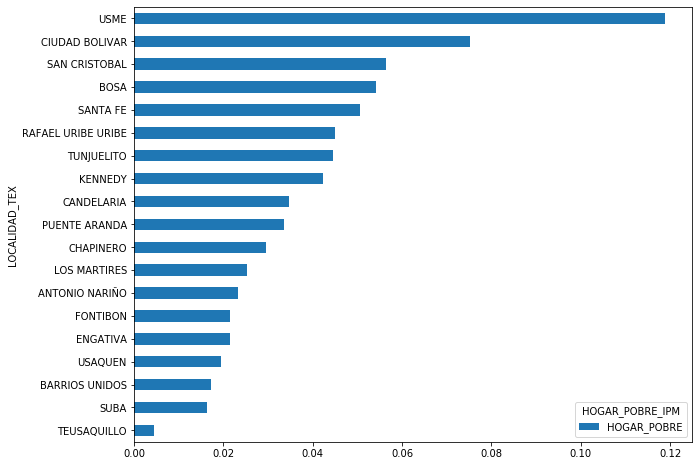

In [72]:
#prop=prop.sort_values(by=['HOGAR_POBRE'],ascending=False)
prop.groupby('LOCALIDAD_TEX')[['HOGAR_POBRE']].mean().sort_values(by=['HOGAR_POBRE'],ascending=True).plot(kind='barh',figsize=(10,8))

In [74]:
df=bogota_urbana[['HOGAR_POBRE_IPM','LOCALIDAD_TEX']]
IPM=sum(df.HOGAR_POBRE_IPM)/len(df.HOGAR_POBRE_IPM)
print('Proporción de hogares IPM:',IPM)

Proporción de hogares IPM: 0.037942122186495175


# --------------------------------------------------------------------------------------------------------------




# CONDICIONES EDUCATIVAS DEL HOGAR

In [12]:
# IPM ANALFABETISMO
prop1=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_ANALFABET']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop1=prop1.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop1=prop1.replace('\t', '',regex=True)

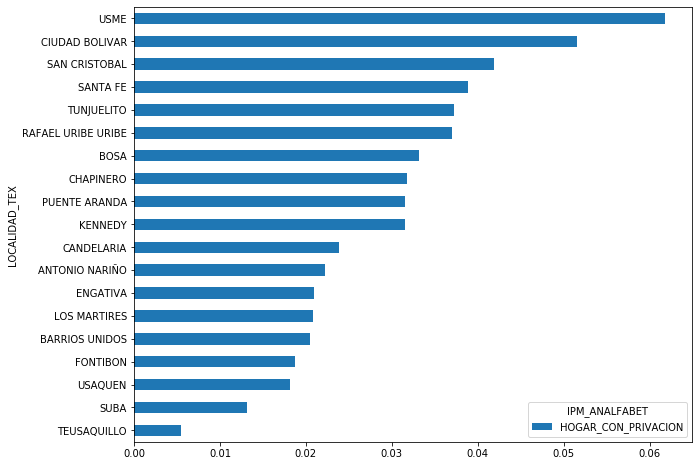

In [294]:
prop1.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=["HOGAR_CON_PRIVACION"],ascending=True).plot(kind='barh', figsize=(10,8))

In [14]:
# IPM BAJO LOGRO_ED
prop6=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_BAJO_LOGRO_ED']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop6=prop6.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop6=prop6.replace('\t', '',regex=True)
prop6

IPM_BAJO_LOGRO_ED,LOCALIDAD_TEX,HOGAR_SIN_PRIVACION,HOGAR_CON_PRIVACION
0,ANTONIO NARIÑO,0.831909,0.168091
1,BARRIOS UNIDOS,0.871122,0.128878
2,BOSA,0.675533,0.324467
3,CANDELARIA,0.816703,0.183297
4,CHAPINERO,0.836295,0.163705
5,CIUDAD BOLIVAR,0.581090,0.418910
6,ENGATIVA,0.837500,0.162500
7,FONTIBON,0.860923,0.139077
8,KENNEDY,0.754725,0.245275
9,LOS MARTIRES,0.764434,0.235566


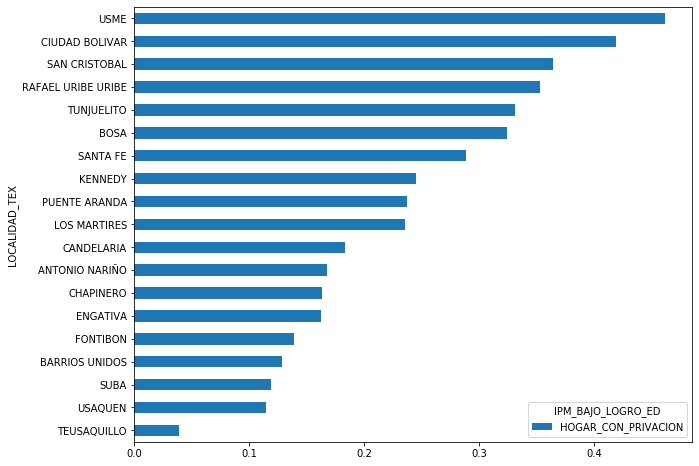

In [15]:
prop6.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=["HOGAR_CON_PRIVACION"],ascending=True).plot(kind='barh', figsize=(10,8))

In [113]:
df=bogota_urbana[['IPM_BAJO_LOGRO_ED','LOCALIDAD_TEX']]
IPM_BAJO_LOGRO_ED=sum(df.IPM_BAJO_LOGRO_ED)/len(df.IPM_BAJO_LOGRO_ED)
print('Proporción de hogares por bajo logro educativo:',IPM_BAJO_LOGRO_ED)


Proporción de hogares por bajo logro educativo: 0.22863076098606644


In [116]:
dummy=pd.get_dummies(bogota_urbana['IPM_BAJO_LOGRO_ED'])
df=df.merge(dummy, left_index=True, right_index=True)
BLED=df.groupby('LOCALIDAD_TEX').agg({"IPM_BAJO_LOGRO_ED": ["sum"]}).reset_index()
BLED=BLED.replace('\t', '',regex=True)
BLED=BLED.sort_values(by=[('IPM_BAJO_LOGRO_ED', 'sum')],ascending=False)
BLED

,LOCALIDAD_TEX,IPM_BAJO_LOGRO_ED
,,sum
8,KENNEDY,2232
5,CIUDAD BOLIVAR,2007
18,USME,1667
12,SAN CRISTOBAL,1470
2,BOSA,1232
11,RAFAEL URIBE URIBE,1136
13,SANTA FE,998
14,SUBA,924
6,ENGATIVA,910


In [31]:
#BLED.groupby(by=['LOCALIDAD_TEX'])[[('IPM_BAJO_LOGRO_ED', 'sum')]].sum().plot(kind='barh', figsize=(10,8))

# CONDICIONES DE LA NIÑEZ Y LA JUVENTUD

In [39]:
# INASISTENCIA ESCOLAR
prop7=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_INASISTENCIA_ESC']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop7=prop7.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop7=prop7.replace('\t', '',regex=True)

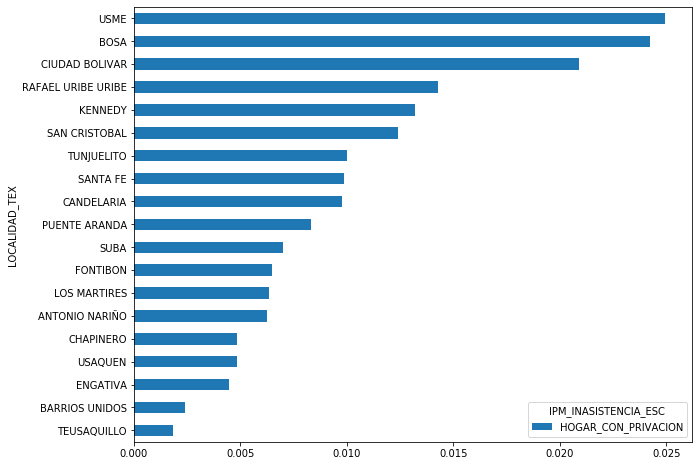

In [40]:
prop7.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=["HOGAR_CON_PRIVACION"],ascending=True).plot(kind='barh', figsize=(10,8))

In [58]:
df=bogota_urbana[['IPM_INASISTENCIA_ESC','LOCALIDAD_TEX']]
IPM_INASISTENCIA_ESC=sum(df.IPM_INASISTENCIA_ESC)/len(df.IPM_INASISTENCIA_ESC)
print('proporcion',IPM_INASISTENCIA_ESC)

proporcion 0.010396570203644158


In [59]:
dummy=pd.get_dummies(bogota_urbana['IPM_INASISTENCIA_ESC'])
df=df.merge(dummy, left_index=True, right_index=True)
INA_ESC=df.groupby('LOCALIDAD_TEX').agg({"IPM_INASISTENCIA_ESC": ["sum"]}).reset_index()
INA_ESC=INA_ESC.replace('\t', '',regex=True)
INA_ESC=INA_ESC.sort_values(by=[('IPM_INASISTENCIA_ESC', 'sum')],ascending=False)

#print(INA_ESC[('IPM_BAJO_LOGRO_ED','sum')].sum())


In [60]:
INA_ESC

,LOCALIDAD_TEX,IPM_INASISTENCIA_ESC
,,sum
8,KENNEDY,120
5,CIUDAD BOLIVAR,100
2,BOSA,92
18,USME,90
14,SUBA,54
12,SAN CRISTOBAL,50
11,RAFAEL URIBE URIBE,46
7,FONTIBON,42
13,SANTA FE,34


In [ ]:
# REZAGO ESCOLAR
prop8=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_REZAGO_ESC']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop8=prop8.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop8=prop8.replace('\t', '',regex=True)

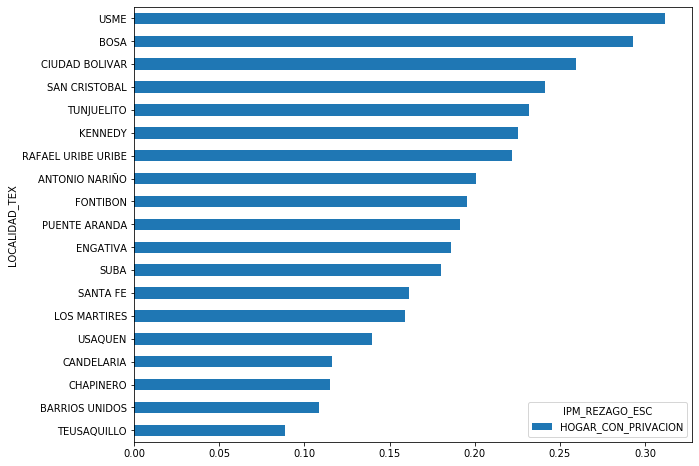

In [297]:
prop8.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=["HOGAR_CON_PRIVACION"],ascending=True).plot(kind='barh', figsize=(10,8))

In [ ]:
# IMP TRABAJO INFANTIL 
prop3=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_TRABAJO_INFANTIL']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop3=prop3.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop3=prop3.replace('\t', '',regex=True)

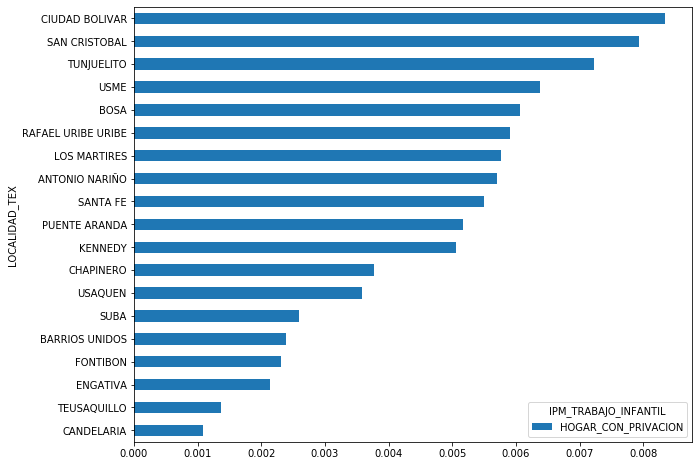

In [298]:
prop3.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=["HOGAR_CON_PRIVACION"],ascending=True).plot(kind='barh', figsize=(10,8))

In [ ]:
df=bogota_urbana[['IPM_TRABAJO_INFANTIL','LOCALIDAD_TEX']]
LP=sum(df.IPM_TRABAJO_INFANTIL)/len(df.IPM_TRABAJO_INFANTIL)
LP

In [ ]:
dummy=pd.get_dummies(bogota_urbana['IPM_TRABAJO_INFANTIL'])
df=df.merge(dummy, left_index=True, right_index=True)
x=df.groupby(['LOCALIDAD_TEX']).agg({'IPM_TRABAJO_INFANTIL': ['sum']}).reset_index()
#print(x[['IPM_HACINAMIENTO']].sum())
x=x.replace('\t', '',regex=True)
x=x.sort_values(by=[('IPM_TRABAJO_INFANTIL', 'sum')],ascending=False)
x

# TRABAJO


In [93]:
# EMPLEO FORMAL
prop2=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_EMPLEO_FORMAL']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop2=prop2.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop2=prop2.replace('\t', '',regex=True)

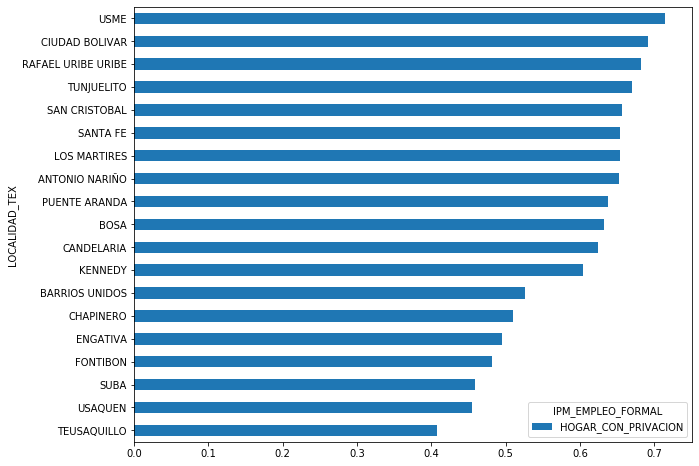

In [64]:
prop2.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=["HOGAR_CON_PRIVACION"],ascending=True).plot(kind='barh', figsize=(10,8))

In [51]:
df=bogota_urbana[['IPM_EMPLEO_FORMAL','LOCALIDAD_TEX']]
empleo=sum(df.IPM_EMPLEO_FORMAL)/len(df.IPM_EMPLEO_FORMAL)
empleo

0.5709271168274384

In [54]:
dummy=pd.get_dummies(bogota_urbana['IPM_EMPLEO_FORMAL'])
df=df.merge(dummy, left_index=True, right_index=True)
empl_informal=df.groupby(['LOCALIDAD_TEX']).agg({'IPM_EMPLEO_FORMAL': ['sum']}).reset_index()
#print(x[['IPM_HACINAMIENTO']].sum())
empl_informal=empl_informal.replace('\t', '',regex=True)
empl_informal=empl_informal.sort_values(by=[('IPM_EMPLEO_FORMAL', 'sum')],ascending=False)


In [55]:
empl_informal

,LOCALIDAD_TEX,IPM_EMPLEO_FORMAL
,,sum
8,KENNEDY,5496
14,SUBA,3545
5,CIUDAD BOLIVAR,3313
7,FONTIBON,3129
6,ENGATIVA,2771
12,SAN CRISTOBAL,2648
18,USME,2578
2,BOSA,2398
13,SANTA FE,2258


# SALUD 

In [61]:
# SIN ASEGURAMIENTO EN SALUD 
prop9=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_ASEG_SALUD']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop9=prop9.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop9=prop9.replace('\t', '',regex=True)

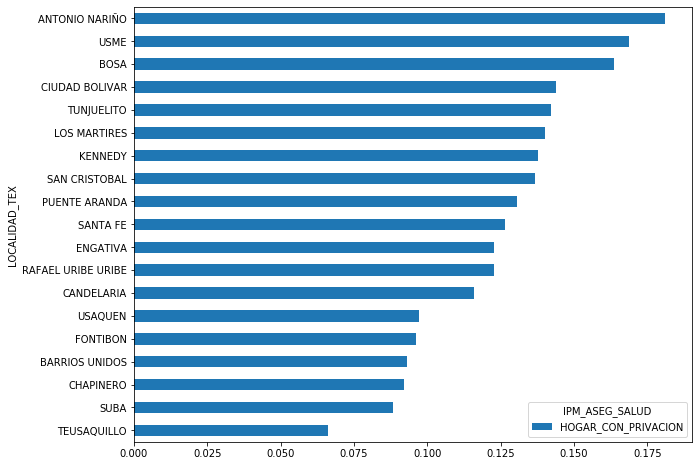

In [62]:
prop9.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=['HOGAR_CON_PRIVACION'],ascending=True).plot(kind='barh', figsize=(10,8))

In [63]:
df=bogota_urbana[['IPM_ASEG_SALUD','LOCALIDAD_TEX']]
salud=sum(df.IPM_ASEG_SALUD)/len(df.IPM_ASEG_SALUD)
salud

0.1212754555198285

In [64]:
dummy=pd.get_dummies(bogota_urbana['IPM_ASEG_SALUD'])
df=df.merge(dummy, left_index=True, right_index=True)
Ipm_salud=df.groupby(['LOCALIDAD_TEX']).agg({'IPM_ASEG_SALUD': ['sum']}).reset_index()
#print(x[['IPM_HACINAMIENTO']].sum())
Ipm_salud=Ipm_salud.replace('\t', '',regex=True)
Ipm_salud=Ipm_salud.sort_values(by=[('IPM_ASEG_SALUD', 'sum')],ascending=False)

In [65]:
Ipm_salud

,LOCALIDAD_TEX,IPM_ASEG_SALUD
,,sum
8,KENNEDY,1255
5,CIUDAD BOLIVAR,689
6,ENGATIVA,688
14,SUBA,682
7,FONTIBON,625
2,BOSA,621
18,USME,609
12,SAN CRISTOBAL,552
17,USAQUEN,462


In [75]:
# ACCESO DE SALUD
prop10=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_ACCESO_SALUD']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop10=prop9.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop10=prop9.replace('\t', '',regex=True)

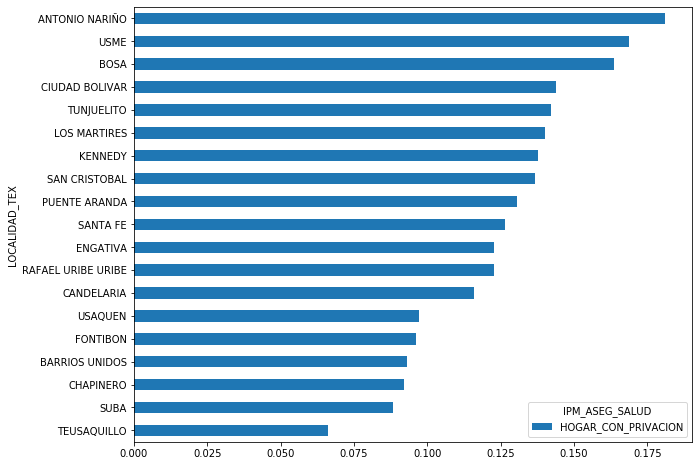

In [76]:
prop10.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=['HOGAR_CON_PRIVACION'],ascending=True).plot(kind='barh', figsize=(10,8))

# ACCESO A SERVICIOS PUBLICOS DOMICILIAROS 

In [19]:
# IPM AGUA
prop4=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_AGUA']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop4=prop4.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop4=prop4.replace('\t', '',regex=True)

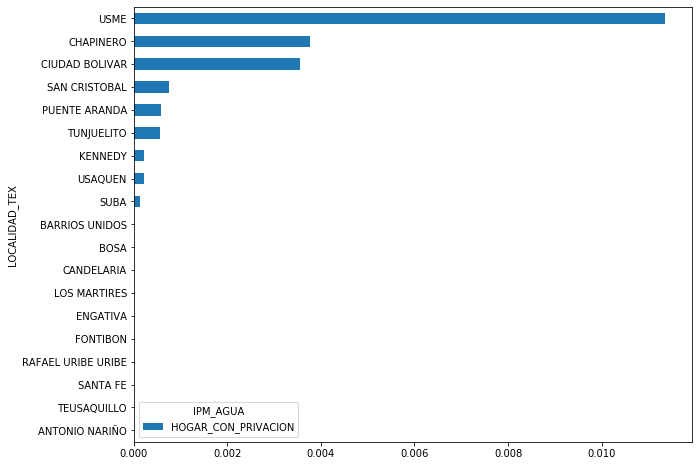

In [20]:
prop4.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=['HOGAR_CON_PRIVACION'],ascending=True).plot(kind='barh', figsize=(10,8))

In [13]:
# HACINAMIENTO 
prop14=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_HACINAMIENTO']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop14=prop14.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop14=prop14.replace('\t', '',regex=True)

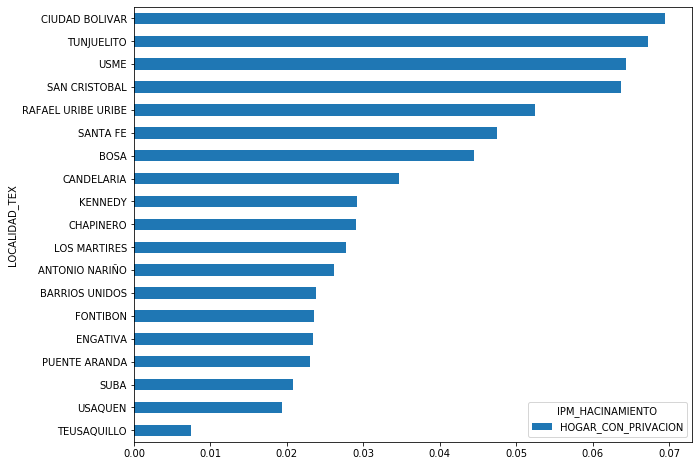

In [14]:
prop14.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=['HOGAR_CON_PRIVACION'],ascending=True).plot(kind='barh', figsize=(10,8))

In [17]:
df=bogota_urbana[['IPM_HACINAMIENTO','LOCALIDAD_TEX']]
haci=sum(df.IPM_HACINAMIENTO)/len(df.IPM_HACINAMIENTO)
haci

0.03469989281886388

In [23]:
dummy=pd.get_dummies(bogota_urbana['IPM_HACINAMIENTO'])
df=df.merge(dummy, left_index=True, right_index=True)
hacinamiento=df.groupby(['LOCALIDAD_TEX']).agg({'IPM_HACINAMIENTO': ['sum']}).reset_index()
#print(x[['IPM_HACINAMIENTO']].sum())
hacinamiento=hacinamiento.replace('\t', '',regex=True)
hacinamiento=hacinamiento.sort_values(by=[('IPM_HACINAMIENTO', 'sum')],ascending=False)

In [24]:
hacinamiento

,LOCALIDAD_TEX,IPM_HACINAMIENTO
,,sum
5,CIUDAD BOLIVAR,333
8,KENNEDY,265
12,SAN CRISTOBAL,257
18,USME,232
2,BOSA,169
11,RAFAEL URIBE URIBE,169
13,SANTA FE,164
14,SUBA,161
7,FONTIBON,153


In [21]:
# IPM_SAN_BASICO (ALCANTARILLADO)
prop11=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_SAN_BASICO']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop11=prop11.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop11=prop11.replace('\t', '',regex=True)

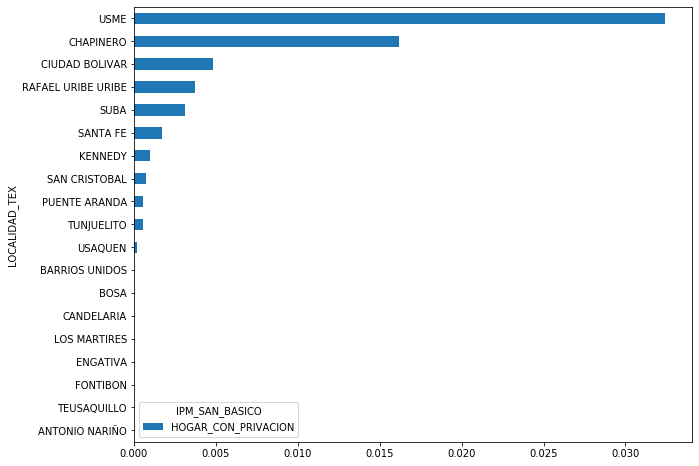

In [22]:
prop11.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=['HOGAR_CON_PRIVACION'],ascending=True).plot(kind='barh', figsize=(10,8))

In [95]:
# PISOS
prop12=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_PISOS']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop12=prop12.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop12=prop12.replace('\t', '',regex=True)

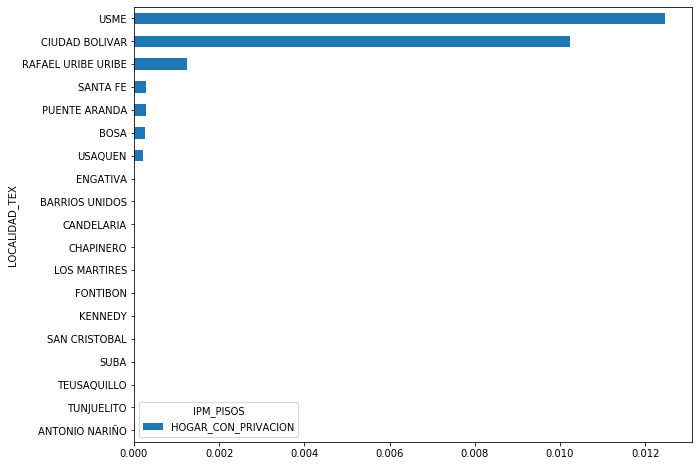

In [96]:
prop12.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=['HOGAR_CON_PRIVACION'],ascending=True).plot(kind='barh', figsize=(10,8))

In [97]:
# PAREDES
prop13=pd.crosstab(bogota_urbana['LOCALIDAD_TEX'],bogota_urbana['IPM_PAREDES']).apply(lambda r: r/r.sum(), axis=1).reset_index()
prop13=prop13.rename(columns={0:'HOGAR_SIN_PRIVACION', 1:'HOGAR_CON_PRIVACION'})
prop13=prop13.replace('\t', '',regex=True)

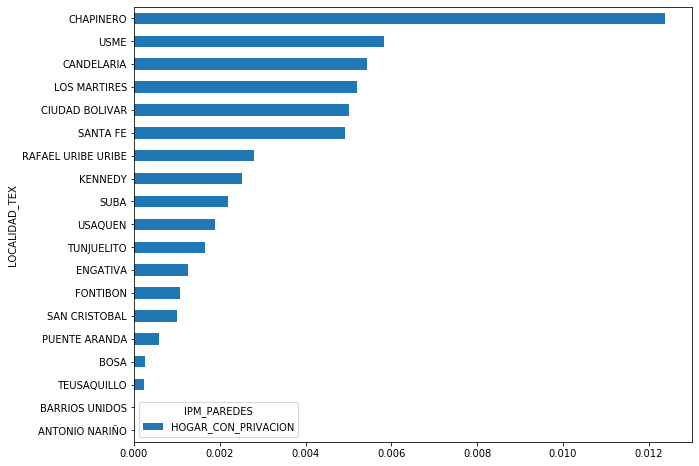

In [98]:
prop13.groupby("LOCALIDAD_TEX")[["HOGAR_CON_PRIVACION"]].mean().sort_values(by=['HOGAR_CON_PRIVACION'],ascending=True).plot(kind='barh', figsize=(10,8))